In [2]:
#importing libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing datasets

df_ratings = pd.read_csv("ratings.csv")

df_links = pd.read_csv("links.csv")
df_movies = pd.read_csv("movies.csv")
df_tags = pd.read_csv("tags.csv")


# EDA 
# Display of Data Sets (Ratings, Links, Movies, Tags)


In [3]:
#rating data_Set head till 10 rows
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
#summary of dataset
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
print("Count or Shape of ratings data set is" + str(df_ratings.shape))
print("Number of unique users are: ", df_ratings['userId'].nunique())
print("Number of movies are: ", df_ratings['movieId'].nunique())
print("Unique Ratings are: ", sorted(df_ratings['rating'].unique()))


Count or Shape of ratings data set is(100836, 4)
Number of unique users are:  610
Number of movies are:  9724
Unique Ratings are:  [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [6]:
##rating link_Set head till 10 rows
df_links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [7]:
print("Shape of Links data set is" + str(df_links.shape))

Shape of Links data set is(9742, 3)


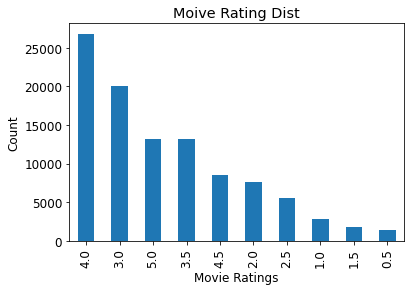

In [8]:
# most rating number given by users
plt.rc('font',size=12)
df_ratings.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Moive Rating Dist')
plt.xlabel('Movie Ratings')
plt.ylabel('Count')
plt.show()

In [9]:
#count number of ratings givne by each user
userID_count=df_ratings['userId'].value_counts()
userID_count.head(15)

414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
Name: userId, dtype: int64

In [10]:
userID_count.tail(15)

324    21
595    20
189    20
207    20
194    20
147    20
257    20
406    20
431    20
278    20
442    20
569    20
320    20
576    20
53     20
Name: userId, dtype: int64

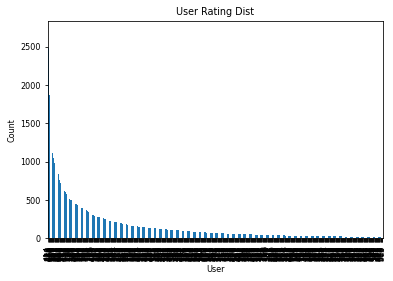

In [11]:
#lets plot the chart of number of ratings given by user
#user given most ratings 
plt.rc('font',size=8)
df_ratings.userId.value_counts(sort=True).plot(kind='bar')
plt.title('User Rating Dist')
plt.xlabel('User')
plt.ylabel('Count')
plt.show()

In [12]:
#as we can see there are user which gave less number of rating on the bar plot above, we can later on remove those user with no. of ratings less than 100



In [13]:
#movie dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
print("Shape of Movies data set is" + str(df_movies.shape))

Shape of Movies data set is(9742, 3)


In [15]:
print('Unique users are: ', df_ratings['userId'].nunique())
print('Unique No. of Moives are: ', df_ratings['movieId'].nunique())
print('Unique No. of Ratings are: ', df_ratings['rating'].nunique())


Unique users are:  610
Unique No. of Moives are:  9724
Unique No. of Ratings are:  10


In [16]:
#tag dataset
df_tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [17]:
print("Shape of Tags data set is" + str(df_tags.shape))

Shape of Tags data set is(3683, 4)


In [18]:
#here I merge movies dataset and ratings dataset
df=pd.merge(df_ratings,df_movies, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [19]:
df.sort_values(by='userId')


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12117,1,2389,2.0,964983094,Psycho (1998),Crime|Horror|Thriller
12126,1,2395,5.0,964981093,Rushmore (1998),Comedy|Drama
12182,1,2406,4.0,964982310,Romancing the Stone (1984),Action|Adventure|Comedy|Romance
776,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
...,...,...,...,...,...,...
84152,610,51709,5.0,1479545147,"Host, The (Gwoemul) (2006)",Comedy|Drama|Horror|Sci-Fi|Thriller
26937,610,589,5.0,1479542983,Terminator 2: Judgment Day (1991),Action|Sci-Fi
69808,610,66097,4.0,1493846499,Coraline (2009),Animation|Fantasy|Thriller
69820,610,71464,4.0,1479544359,"Serious Man, A (2009)",Comedy|Drama


In [20]:
#user1_only=df[df['userId']==1]
#user1_only.head(50)
#user1_only.shape

In [21]:
#making a table dataframe which has movie name and there mean ratings and total count 

df_avg_ratings=df.groupby('title').agg(ratings_count=('rating','count'),ratings_mean=('rating','mean')).reset_index()

#sort by rating count to find which are the most rated movie
df_avg_ratings.sort_values(by='ratings_count',ascending=False).head()


,title,ratings_count,ratings_mean
3158,Forrest Gump (1994),329,4.164134
7593,"Shawshank Redemption, The (1994)",317,4.429022
6865,Pulp Fiction (1994),307,4.197068
7680,"Silence of the Lambs, The (1991)",279,4.161290
5512,"Matrix, The (1999)",278,4.192446


In [22]:
df_merge = pd.merge(df,df_avg_ratings[['title']], on='title', how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [23]:
df_merge.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [24]:
#creating user base matrix
user_matrix=df.pivot_table(index='userId',columns='title', values='rating')
user_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Taking Person correlation

In [25]:
#taking pearson similarity correlation
user_sim=user_matrix.T.corr('pearson')
user_sim.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


# Selecting 3 users - UserID: 4,5,6 and making there group

In [26]:
#Selecting first target user [ 4 ] for generating 10 simlilar users later on and 20 moveis
user=4
#drop this user from the user_sim
rem_sim1=user_sim.copy()

rem_sim1.drop(index=user, inplace = True)



In [27]:
rem_sim1.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582
6,-0.291636,NaN,NaN,0.148498,0.043166,1.000000,-0.126595,-0.200062,NaN,0.957427,...,-0.292770,-2.749519e-02,-0.112141,-0.090297,0.100735,-0.049192,0.255639,0.125428,0.193649,0.115580


In [28]:
#check top 10 similar users as compared to target user 4
#choosing 20 similar users of the target user
u=20
user_thrsh = 0.05
#user which has similarity more than 0.05 only
sim_users1=rem_sim1[rem_sim1[user]>user_thrsh][user].sort_values(ascending=False)[:u]

print("similar user for "+ str(user) + " are "+ str(sim_users1.head(20)))


similar user for 4 are userId
299    1.000000
360    1.000000
518    1.000000
544    1.000000
396    1.000000
378    0.986440
44     0.982708
502    0.927173
539    0.891042
521    0.887412
397    0.878310
43     0.874007
481    0.866025
162    0.866025
151    0.866025
340    0.816497
475    0.814345
46     0.771744
75     0.745872
498    0.707107
Name: 4, dtype: float64


In [29]:
#movies watched by selected user 4
user_watched=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched

title,12 Angry Men (1957),"Adventures of Priscilla, Queen of the Desert, The (1994)",Afterglow (1997),Airplane! (1980),Aladdin (1992),All About My Mother (Todo sobre mi madre) (1999),Almost Famous (2000),Amadeus (1984),American Beauty (1999),Austin Powers: International Man of Mystery (1997),...,Waiting for Guffman (1996),Waking Ned Devine (a.k.a. Waking Ned) (1998),West Side Story (1961),What About Bob? (1991),"Wild Bunch, The (1969)",Willy Wonka & the Chocolate Factory (1971),"Wings of Desire (Himmel über Berlin, Der) (1987)",With Honors (1994),"Wizard of Oz, The (1939)",Wonder Boys (2000)
userId,,,,,,,,,,,,,,,,,,,,,
4,5.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,...,5.0,4.0,5.0,3.0,2.0,4.0,1.0,2.0,5.0,4.0


In [30]:
#print common movies watched by 10 similar users of target user
movies_similar_user1=user_matrix[user_matrix.index.isin(sim_users1.index)].dropna(axis=1, how='all')
movies_similar_user1.head(10)

title,1-900 (06) (1994),101 Dalmatians (1996),2001: A Space Odyssey (1968),50/50 (2011),A.I. Artificial Intelligence (2001),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Adventures of Pinocchio, The (1996)",Air Force One (1997),...,Witness for the Prosecution (1957),Wolf (1994),"Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: Days of Future Past (2014),X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Zombieland (2009),Zootopia (2016)
userId,,,,,,,,,,,,,,,,,,,,,
43,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
score_list1={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user1.columns:
    movie_rating=movies_similar_user1[i]
    tsc=0
    count=0
    for u in sim_users1.index:
        if pd.isna(movie_rating[u])==False:
            score=sim_users1[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list1[i]=tsc/count

score_list1=pd.DataFrame(score_list1.items(), columns=['movie', 'movie_score'])
score_list1=score_list1.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" movies based on User "+ str(user))

score_list1.head(mov)

Top 20 movies based on User 4


,movie,movie_score
116,"Cry, the Beloved Country (1995)",5.000000
583,William Shakespeare's Romeo + Juliet (1996),5.000000
148,Ed (1996),5.000000
350,Moll Flanders (1996),5.000000
532,"Thin Line Between Love and Hate, A (1996)",5.000000
520,That Thing You Do! (1996),5.000000
385,"Peacemaker, The (1997)",5.000000
188,French Twist (Gazon maudit) (1995),5.000000
26,Anne Frank Remembered (1995),5.000000
399,"Player, The (1992)",5.000000


In [32]:
for i in movies_similar_user1.columns:
    print(i)

1-900 (06) (1994)
101 Dalmatians (1996)
2001: A Space Odyssey (1968)
50/50 (2011)
A.I. Artificial Intelligence (2001)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Addams Family Values (1993)
Adventures of Pinocchio, The (1996)
Air Force One (1997)
Airheads (1994)
Airport (1970)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alien (1979)
Alien: Resurrection (1997)
Aliens (1986)
Alien³ (a.k.a. Alien 3) (1992)
All Dogs Go to Heaven 2 (1996)
Almost Famous (2000)
Amazing Spider-Man, The (2012)
American History X (1998)
American President, The (1995)
Amistad (1997)
Anchorman: The Legend of Ron Burgundy (2004)
Andromeda Strain, The (1971)
Anne Frank Remembered (1995)
Annie Hall (1977)
Apollo 13 (1995)
Argo (2012)
Aristocats, The (1970)
Army of Darkness (1993)
Assassins (1995)
Atlantis: The Lost Empire (2001)
Austin Powers: International Man of Mystery (1997)
Avatar (2009)
Avengers, The (2012)
Avengers: Age of Ultron (2015)
Babe (1995)
Baby-Sitters Club, The (

In [33]:
for i in movies_similar_user1.columns:
    movie_rating=movies_similar_user1[i]
    print(movie_rating)

userId
43     NaN
44     4.0
46     NaN
75     NaN
151    NaN
162    NaN
299    NaN
340    NaN
360    NaN
378    NaN
396    NaN
397    NaN
475    NaN
481    NaN
498    NaN
502    NaN
518    NaN
521    NaN
539    NaN
544    NaN
Name: 1-900 (06) (1994), dtype: float64
userId
43     NaN
44     NaN
46     NaN
75     NaN
151    3.0
162    NaN
299    NaN
340    NaN
360    NaN
378    NaN
396    NaN
397    NaN
475    NaN
481    NaN
498    NaN
502    NaN
518    NaN
521    NaN
539    NaN
544    NaN
Name: 101 Dalmatians (1996), dtype: float64
userId
43     NaN
44     NaN
46     NaN
75     3.5
151    NaN
162    NaN
299    NaN
340    NaN
360    NaN
378    NaN
396    NaN
397    NaN
475    NaN
481    NaN
498    NaN
502    NaN
518    NaN
521    NaN
539    NaN
544    NaN
Name: 2001: A Space Odyssey (1968), dtype: float64
userId
43     NaN
44     NaN
46     NaN
75     NaN
151    NaN
162    NaN
299    NaN
340    NaN
360    NaN
378    NaN
396    NaN
397    NaN
475    NaN
481    NaN
498    NaN
502    NaN
5

In [34]:
for u in sim_users1.index:
    print(u)

299
360
518
544
396
378
44
502
539
521
397
43
481
162
151
340
475
46
75
498


In [280]:
score_list1.shape

(597, 2)

# 2nd Target User

In [281]:
#Selecting Second target user [ 5 ] for generating 10 simlilar users later on and 20 moveis
user=5
#drop this user from the user_sim
rem_sim2=user_sim.copy()

rem_sim2.drop(index=user, inplace = True)


In [282]:
rem_sim2.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
6,-0.291636,NaN,NaN,0.148498,0.043166,1.000000,-0.126595,-0.200062,NaN,0.957427,...,-0.292770,-2.749519e-02,-0.112141,-0.090297,0.100735,-0.049192,0.255639,0.125428,0.193649,0.115580


In [283]:
#check top 10 similar users as compared to second target user 5
#choosing 20 similar users of the second target user
u=20
user_thrsh = 0.05
#user which has similarity more than 0.05 only
sim_users2=rem_sim2[rem_sim2[user]>user_thrsh][user].sort_values(ascending=False)[:u]

print("similar user for "+ str(user) + " are "+ str(sim_users2.head(20)))


similar user for 5 are userId
408    1.000000
85     1.000000
189    1.000000
405    1.000000
478    1.000000
190    1.000000
31     1.000000
285    1.000000
350    1.000000
228    1.000000
300    1.000000
540    1.000000
73     1.000000
552    1.000000
12     1.000000
341    1.000000
225    1.000000
351    1.000000
553    0.981981
393    0.977356
Name: 5, dtype: float64


In [284]:
#movies watched by selected second user 5
user_watched=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched

title,Ace Ventura: Pet Detective (1994),Addams Family Values (1993),Aladdin (1992),Apollo 13 (1995),Babe (1995),Batman (1989),Batman Forever (1995),Beauty and the Beast (1991),Braveheart (1995),Clear and Present Danger (1994),...,Schindler's List (1993),"Secret Garden, The (1993)",Shadowlands (1993),"Shawshank Redemption, The (1994)",Snow White and the Seven Dwarfs (1937),Stargate (1994),Terminator 2: Judgment Day (1991),Toy Story (1995),True Lies (1994),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
5,3.0,3.0,4.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,...,5.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,2.0,4.0


In [285]:
#print common movies watched by 10 similar users of target user
movies_similar_user2=user_matrix[user_matrix.index.isin(sim_users2.index)].dropna(axis=1, how='all')
movies_similar_user2.head(10)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),12 Angry Men (1957),127 Hours (2010),"13th Warrior, The (1999)",17 Again (2009),2001: A Space Odyssey (1968),2012 (2009),...,Yes Man (2008),You Don't Mess with the Zohan (2008),Young Frankenstein (1974),Zack and Miri Make a Porno (2008),Zathura (2005),Zodiac (2007),Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016)
userId,,,,,,,,,,,,,,,,,,,,,
12,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,4.0,NaN,NaN,NaN,4.0,NaN,3.5,4.0,2.0,...,4.0,NaN,NaN,4.0,NaN,4.5,5.0,NaN,NaN,5.0
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
score_list2={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user2.columns:
    movie_rating=movies_similar_user2[i]
    tsc=0
    count=0
    for u in sim_users2.index:
        if pd.isna(movie_rating[u])==False:
            score=sim_users2[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list2[i]=tsc/count

score_list2=pd.DataFrame(score_list2.items(), columns=['movie', 'movie_score'])
score_list2=score_list2.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" movies based on second target User "+ str(user))
score_list2.head(mov)

Top 20 movies based on second target User 5


,movie,movie_score
556,Lord of War (2005),5.0
885,The Count of Monte Cristo (2002),5.0
492,Jack Reacher (2012),5.0
570,"Man from Earth, The (2007)",5.0
606,Mission: Impossible - Rogue Nation (2015),5.0
461,"Illusionist, The (2006)",5.0
662,Oblivion (2013),5.0
685,Patton (1970),5.0
370,Ghost in the Shell (Kôkaku kidôtai) (1995),5.0
793,Shaolin Soccer (Siu lam juk kau) (2001),5.0


# Third target user 6

In [287]:
#Selecting Second target user [ 10 ] for generating 10 simlilar users later on and 20 moveis
user=10
#drop this user from the user_sim
rem_sim3=user_sim.copy()

rem_sim3.drop(index=user, inplace = True)


In [288]:
rem_sim3.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [289]:
#check top 10 similar users as compared to second target user 6
#choosing 20 similar users of the second target user
u=20
user_thrsh = 0.01
#user which has similarity more than 0.01 only
sim_users3=rem_sim3[rem_sim3[user]>user_thrsh][user].sort_values(ascending=False)[:u]

print("similar user for "+ str(user) + " are "+ str(sim_users3.head(20)))


similar user for 10 are userId
56     1.000000
136    1.000000
574    1.000000
225    1.000000
568    1.000000
478    1.000000
179    1.000000
575    1.000000
384    1.000000
162    1.000000
192    1.000000
315    1.000000
146    1.000000
244    0.991241
284    0.987829
498    0.987829
43     0.984732
558    0.964901
6      0.957427
175    0.944911
Name: 10, dtype: float64


In [290]:
#movies watched by selected second user 6
user_watched=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched

title,27 Dresses (2008),300 (2007),50 First Dates (2004),About Time (2013),About a Boy (2002),Aladdin (1992),"Amazing Spider-Man, The (2012)",American Beauty (1999),As Good as It Gets (1997),Avatar (2009),...,Walk the Line (2005),"Walk to Remember, A (2002)",Water for Elephants (2011),"Wedding Date, The (2005)",What Happens in Vegas... (2008),What a Girl Wants (2003),When Harry Met Sally... (1989),White House Down (2013),"Wolf of Wall Street, The (2013)",Yes Man (2008)
userId,,,,,,,,,,,,,,,,,,,,,
10,3.0,3.0,3.5,4.0,3.5,4.0,3.0,1.0,3.5,2.5,...,4.0,3.0,3.0,2.5,2.0,3.0,3.0,4.0,1.0,0.5


In [291]:
#print common movies watched by 10 similar users of target user
movies_similar_user3=user_matrix[user_matrix.index.isin(sim_users3.index)].dropna(axis=1, how='all')
movies_similar_user3.head(10)

title,*batteries not included (1987),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),13 Going on 30 (2004),"13th Warrior, The (1999)",2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",200 Cigarettes (1999),...,With Honors (1994),Wolf (1994),Working Girl (1988),"World According to Garp, The (1982)","World Is Not Enough, The (1999)",Wyatt Earp (1994),X-Men (2000),"Year of Living Dangerously, The (1982)",You Got Served (2004),Youngblood (1986)
userId,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,4.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,3.0,4.0,2.5,3.0,NaN,NaN,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
score_list3={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
score=0
for i in movies_similar_user3.columns:
    movie_rating=movies_similar_user3[i]
    tsc=0
    count=0
    for u in sim_users3.index:
        if pd.isna(movie_rating[u])==False:
            score=sim_users3[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list3[i]=tsc/count
score_list3=pd.DataFrame(score_list3.items(), columns=['movie', 'movie_score'])
score_list3=score_list3.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" movies based on second target User "+ str(user))
score_list3.head(mov)

Top 20 movies based on second target User 10


,movie,movie_score
604,Snatch (2000),5.0
588,Shakespeare in Love (1998),5.0
294,"Graduate, The (1967)",5.0
458,Murder in the First (1995),5.0
663,To Kill a Mockingbird (1962),5.0
267,Friday the 13th (1980),5.0
642,Tales from the Darkside: The Movie (1990),5.0
629,"Streetcar Named Desire, A (1951)",5.0
511,Pink Floyd: The Wall (1982),5.0
217,"Elephant Man, The (1980)",5.0


In [293]:
type(score_list3)

pandas.core.frame.DataFrame

In [294]:
#merging 2 users to get common movie and score data frame
df_merge=pd.merge(score_list1,score_list2, on='movie')
df_merge.head(20)

,movie,movie_score_x,movie_score_y
0,"Player, The (1992)",5.000000,4.000000
1,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567
2,"Prestige, The (2006)",4.932200,4.333333
3,Inception (2010),4.932200,3.985847
4,Cool Hand Luke (1967),4.750000,4.500000
5,L.A. Confidential (1997),4.665064,4.250000
6,Blazing Saddles (1974),4.635863,4.250000
7,"Clockwork Orange, A (1971)",4.635863,4.795593
8,Little Shop of Horrors (1986),4.635863,3.500000
9,Gladiator (2000),4.535863,4.136474


In [295]:
#top 30 recommended common movies for group 
#merged all 3 group users to get common movie and score
df_merge1=pd.merge(df_merge, score_list3, on='movie')
df_merge1.head(30)


,movie,movie_score_x,movie_score_y,movie_score
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000
3,Gladiator (2000),4.535863,4.136474,4.956204
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476
5,"Princess Bride, The (1987)",4.455211,4.500000,4.478102
6,Leaving Las Vegas (1995),4.437060,3.000000,2.872281
7,Fargo (1996),4.383593,3.218466,3.957427
8,Star Trek: First Contact (1996),4.381061,4.500000,4.939932
9,Snow White and the Seven Dwarfs (1937),4.370037,3.750000,4.084456


In [296]:
#top 30 recommended common movies for group 
#renaming column name
df_merge1.columns=['movie', 'score1','score2','score3']
df_merge1.head(30)

,movie,score1,score2,score3
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000
3,Gladiator (2000),4.535863,4.136474,4.956204
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476
5,"Princess Bride, The (1987)",4.455211,4.500000,4.478102
6,Leaving Las Vegas (1995),4.437060,3.000000,2.872281
7,Fargo (1996),4.383593,3.218466,3.957427
8,Star Trek: First Contact (1996),4.381061,4.500000,4.939932
9,Snow White and the Seven Dwarfs (1937),4.370037,3.750000,4.084456


In [303]:
df_avg=df_merge1.copy()
df_avg.head()

,movie,score1,score2,score3
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000
3,Gladiator (2000),4.535863,4.136474,4.956204
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476


In [304]:
df_avg['avg_score']=(df_avg['score1']+df_avg['score2']+df_avg['score3'])/3
df_avg.head(20)

,movie,score1,score2,score3,avg_score
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141,3.735902
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000,4.416667
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000,4.143819
3,Gladiator (2000),4.535863,4.136474,4.956204,4.542847
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476,4.196475
5,"Princess Bride, The (1987)",4.455211,4.500000,4.478102,4.477771
6,Leaving Las Vegas (1995),4.437060,3.000000,2.872281,3.436447
7,Fargo (1996),4.383593,3.218466,3.957427,3.853162
8,Star Trek: First Contact (1996),4.381061,4.500000,4.939932,4.606998
9,Snow White and the Seven Dwarfs (1937),4.370037,3.750000,4.084456,4.068164


# Movies recommended: First aggregation approach is the average method.

In [305]:
#df.drop(['B', 'C'], axis=1)
#top 25 movies recommended on the basis of Average Method
df_avg=df_avg.drop(['score1', 'score2', 'score3'], axis=1)
df_avg.sort_values(by='avg_score', ascending=False).head(25)

,movie,avg_score
42,Jaws (1975),4.666667
48,"Streetcar Named Desire, A (1951)",4.650798
8,Star Trek: First Contact (1996),4.606998
3,Gladiator (2000),4.542847
17,Little Women (1994),4.478179
5,"Princess Bride, The (1987)",4.477771
20,Casino (1995),4.464994
46,"Fugitive, The (1993)",4.451618
30,"Lord of the Rings: The Fellowship of the Ring,...",4.427295
1,Cool Hand Luke (1967),4.416667


In [306]:
df_min=df_merge1.copy()
df_min.head()

,movie,score1,score2,score3
0,Léon: The Professional (a.k.a. The Professiona...,5.000000,4.271567,1.936141
1,Cool Hand Luke (1967),4.750000,4.500000,4.000000
2,"Clockwork Orange, A (1971)",4.635863,4.795593,3.000000
3,Gladiator (2000),4.535863,4.136474,4.956204
4,Robin Hood: Men in Tights (1993),4.502950,4.500000,3.586476


#  least misery method

In [ ]:
#data['min_c_h'] = data[['flow_h','flow_c']].min(axis=1)
#For LEAST MISERY, taking min value
df_min['new_score']=df_min[['score1','score2','score3']].min(axis=1)
df_min.head(20)

# Top 25 movies Recommended by Least Misery Method

In [302]:
#removing indvidual user scores and considering only LEast misery score
df_min=df_min.drop(['score1', 'score2', 'score3'], axis=1)

#top 25 movies recommended on the basis of Minimum Score
df_min.sort_values(by='new_score', ascending=False).head(25)

,movie,new_score
5,"Princess Bride, The (1987)",4.455211
8,Star Trek: First Contact (1996),4.381061
17,Little Women (1994),4.350082
20,Casino (1995),4.330127
3,Gladiator (2000),4.136474
30,"Lord of the Rings: The Fellowship of the Ring,...",4.080022
27,"Silence of the Lambs, The (1991)",4.072697
34,Batman Begins (2005),4.051767
29,Mr. Holland's Opus (1995),4.000000
1,Cool Hand Luke (1967),4.000000
